In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Problem 1: Working with 2D Arrays

In [2]:
np.random.seed(1)
Z = np.round(np.random.uniform(0, 10, (5, 8)), 2)
Z = np.round(Z, 2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
third_row = Z[2, :]
sixth_column = Z[:, 5]
print("Row 3:\t\t",third_row )
print("Column 6:\t",sixth_column)


Row 3:		 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
Column 6:	 [0.92 8.78 9.68 8.78 8.35]


In [4]:
column_sums = np.sum(Z, axis=0)
row_sums = np.sum(Z, axis=1)
array_sum = np.sum(Z)
print("Row Sums:\t",row_sums)
print("Column Sums:\t",column_sums)
print("Array Sum:\t",array_sum)

Row Sums:	 [22.1  38.19 40.88 34.62 47.89]
Column Sums:	 [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sum:	 183.68


## Problem 2: Reshaping and Stacking Arrays

In [5]:
np.random.seed(167)
x1 = np.random.normal(50, 10, size=1000)
x2 = np.random.normal(20, 5, size=1000)
x3 = np.random.normal(100, 30, size=1000)
x4 = np.random.normal(10, 2, size=1000)
x1=x1.reshape(-1, 1)
x2=x2.reshape(-1, 1)
x3=x3.reshape(-1, 1)
x4=x4.reshape(-1, 1)
x=np.hstack((x1,x2,x3,x4))
x = np.round(x, 2)
print("Shape of X:", x.shape)


Shape of X: (1000, 4)


In [6]:
print(" the elements in the first 6 rows of:")
print(x[:6, :])

 the elements in the first 6 rows of:
[[ 37.08  16.71 138.06   8.89]
 [ 41.32  19.91  99.61   9.86]
 [ 63.15  14.43  70.08  11.6 ]
 [ 50.03  12.71  95.05   8.47]
 [ 55.05  24.4   62.16   9.49]
 [ 59.24  25.68  64.57  12.84]]


## Problem 3: Standardization

In [7]:
means_X = np.mean(x, axis=0)
std_X = np.std(x, axis=0)
print("Column means:\t\t\t",np.round(means_X,2))
print("Column standard deviations:\t",np.round(std_X,2))

Column means:			 [50.21 19.86 99.84 10.06]
Column standard deviations:	 [ 9.69  5.08 30.88  2.03]


In [8]:
W = (x - means_X) / std_X
means_W = np.mean(W, axis=0)
std_W = np.std(W, axis=0)
print("Column means:\t\t\t",np.round(means_W,2))
print("Column standard deviations \t",np.round(std_W,2))

Column means:			 [ 0. -0. -0. -0.]
Column standard deviations 	 [1. 1. 1. 1.]


## Problem 4: Load Auto MPG Dataset

In [9]:
auto = pd.read_csv("auto_mpg.txt", sep='\t')
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
print("shape:", auto.shape)

shape: (398, 5)


In [11]:
means_auto = auto.mean(numeric_only=True)
print(means_auto)

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64


## Problem 5: Regional Counts and Means

In [12]:
regions = np.unique(auto['region'])
print(regions)
asia_auto = auto[auto['region'] == 'asia']
eur_auto = auto[auto['region'] == 'eur']
usa_auto = auto[auto['region'] == 'usa']

['asia' 'eur' 'usa']


In [13]:
cars_asia = len(asia_auto)
cars_europe = len(eur_auto)
cars_usa = len(usa_auto)
print("Number of cars manufactured in Asia:\t",cars_asia)
print("Number of cars manufactured in Europe:\t",cars_europe)
print("Number of cars manufactured in USA:\t",cars_usa)

Number of cars manufactured in Asia:	 79
Number of cars manufactured in Europe:	 70
Number of cars manufactured in USA:	 249


In [14]:
asia_means =np. mean(asia_auto[['mpg', 'cyl', 'wt']], axis=0)
eur_means = np.mean(eur_auto[['mpg', 'cyl', 'wt']], axis=0)
usa_means = np.mean(usa_auto[['mpg', 'cyl', 'wt']], axis=0)
mean_df = pd.DataFrame({'mpg': [asia_means[0], eur_means[0], usa_means[0]],
                         'cyl': [asia_means[1], eur_means[1], usa_means[1]],
                         'wt': [asia_means[2], eur_means[2], usa_means[2]]},
                          index=regions)
mean_df

,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

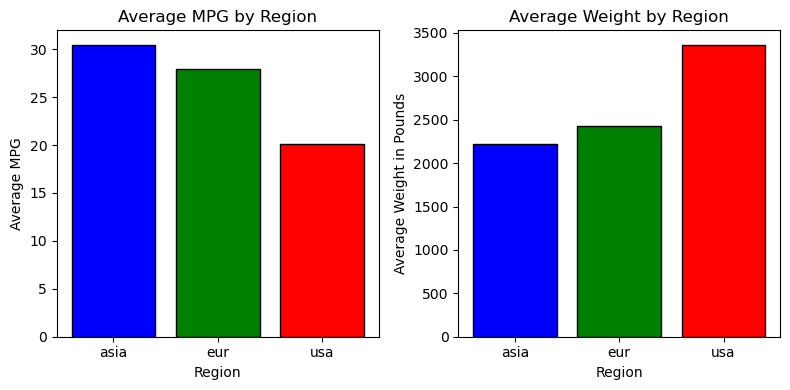

In [15]:
colors1 = ['blue', 'green', 'red']
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].bar(mean_df.index, mean_df['mpg'], color=colors1, edgecolor='black')
axes[0].set_title("Average MPG by Region")
axes[0].set_ylabel("Average MPG")
axes[0].set_xlabel("Region")
axes[1].bar(mean_df.index, mean_df['wt'], color=colors1, edgecolor='black')
axes[1].set_title("Average Weight by Region")
axes[1].set_ylabel("Average Weight in Pounds")
axes[1].set_xlabel("Region")
plt.tight_layout()
plt.show()

## Problem 7: Relationship between Weight and Miles Per Gallon

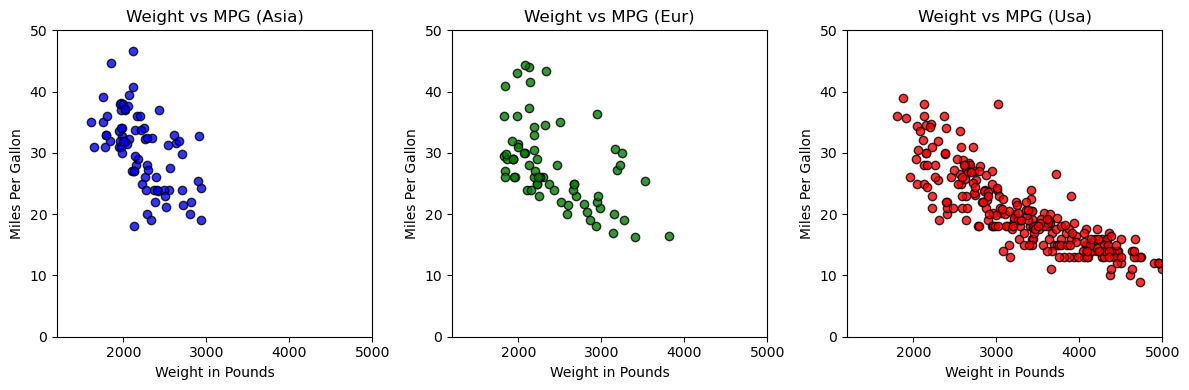

In [16]:
plt.figure(figsize=[12, 4])
for i,region in enumerate(regions):
    plt.subplot(1, 3, i+1)    
    region_data = auto[auto['region'] == region]
    plt.scatter(region_data['wt'], region_data['mpg'], color=colors1[i], edgecolor='black', alpha=0.8)
    plt.xlim(1200, 5000)
    plt.ylim(0, 50)
    plt.xlabel("Weight in Pounds")
    plt.ylabel("Miles Per Gallon")
    plt.title(f"Weight vs MPG ({region.capitalize()})")
plt.tight_layout()
plt.show()


## Problem 8: Cylinder Distribution by Region

In [17]:
cyl_values = np.unique(auto['cyl'])
print(cyl_values)

[3 4 5 6 8]


In [18]:
cyl_counts_by_region = pd.crosstab(auto['cyl'], auto['region'])
cyl_counts_by_region

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


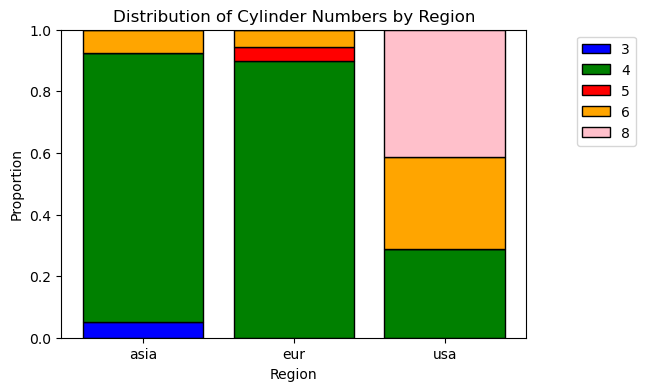

In [19]:
cyl_props_by_region = cyl_counts_by_region / cyl_counts_by_region.sum()
bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region
colors2 = ['blue', 'green', 'red', 'orange','','pink']
plt.figure(figsize=[6, 4])
for index, row in cyl_props_by_region.iterrows():
    plt.bar(cyl_props_by_region.columns,row,
            bottom=bar_bottoms.loc[index],
            color=colors2[index-3] ,
            edgecolor='black', label=f'{index}')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Distribution of Cylinder Numbers by Region')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


In [20]:
print(cyl_props_by_region)

region      asia       eur       usa
cyl                                 
3       0.050633  0.000000  0.000000
4       0.873418  0.900000  0.289157
5       0.000000  0.042857  0.000000
6       0.075949  0.057143  0.297189
8       0.000000  0.000000  0.413655
